In [2]:
import numpy as np
import matplotlib.pyplot as plt
from yambopy import *

#Change me with your own path
WORK_PATH='./data-tests/LiF/'
QE_PATH='./data-tests/LiF/'
YAMBO_PATH = f'./data-tests/LiF/Optics'
ry2ev=13.505703975

# Istance of useful classes
#savedb_k = YamboSaveDB.from_db_file(f'{YAMBO_PATH}/yambo-DS/10x10x10/SAVE')
lat_k = YamboLatticeDB.from_db_file(f'{YAMBO_PATH}/yambo-DS/10x10x10/SAVE/')
#savedb_q = YamboSaveDB.from_db_file(f'{YAMBO_PATH}/yambo-DS/5x5x5/SAVE')
lat_q = YamboLatticeDB.from_db_file(f'{YAMBO_PATH}/yambo-DS/5x5x5/SAVE/')
nnkp_kgrid = NNKP_Grids(f'{QE_PATH}/nscf-wannier-10x10x10//LiF', lat_k, yambo_grid=True)
nnkp_qgrid = NNKP_Grids(f'{QE_PATH}/nscf-wannier-5x5x5//LiF', lat_q, yambo_grid=True)
nnkp_kgrid.get_kmq_grid(nnkp_qgrid)
nnkp_kgrid.get_qpb_grid(nnkp_qgrid)
nnkp_qgrid.get_qpb_grid(nnkp_qgrid)
nnkp_kgrid.get_kpbover2_grid(nnkp_qgrid)
nnkp_kgrid.get_kmqmbover2_grid(nnkp_qgrid)


Time for NNKP.__init__() : 0.04932236671447754
Time for NNKP.__init__() : 0.007372856140136719


In [143]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def drop_axis(points, axis_index):
    return np.delete(points, axis_index, axis=1)

def check_kgridoperations_2d(nnkp_kgrid, nnkp_qgrid, ik, iq, fixed_axis='z', operation='kmqmbover2', fixed_value=0.0):
    k_grid = nnkp_kgrid.k
    q_grid = nnkp_qgrid.k

    transformed = []
    for ib in range(8):
        if (operation == 'kmqmbover2'):
            new_point = nnkp_kgrid.k[nnkp_kgrid.kmqmbover2_grid_table[ik, iq, ib, 1]]
            original_point = nnkp_kgrid.k[nnkp_kgrid.kmqmbover2_grid_table[ik, iq, ib, 0]]
        elif(operation=='kmq'):
            new_point = nnkp_kgrid.k[nnkp_kgrid.kmq_grid_table[ik, iq, 1]]
            original_point = nnkp_kgrid.k[nnkp_kgrid.kmq_grid_table[ik, iq, 0]]
        elif(operation=='kpbover2'):
            new_point = nnkp_kgrid.k[nnkp_kgrid.kpbover2_grid_table[ik, ib, 1]]
            original_point = nnkp_kgrid.k[nnkp_kgrid.kpbover2_grid_table[ik, ib, 0]]  
        transformed.append(new_point)
    transformed = np.array(transformed)

    k_point = k_grid[ik]
    #if you call operations that do not use q-point, set iq=0 (gamma)
    q_point = q_grid[iq]

    # Select 2D plane
    axis_index = {'x': 0, 'y': 1, 'z': 2}[fixed_axis]

    def filter_plane(points):
        return points[np.isclose(points[:, axis_index], fixed_value, atol=1e-2)]

    k_plane = filter_plane(np.array([original_point]))
    q_plane = filter_plane(np.array([q_point]))    
    transformed_plane = filter_plane(transformed)
    all_plane = filter_plane(k_grid)

    k_set = set(map(tuple, np.round(k_plane, 6)))
    q_set = set(map(tuple, np.round(q_plane, 6)))
    transformed_set = set(map(tuple, np.round(transformed_plane, 6)))
    all_set = set(map(tuple, np.round(all_plane, 6)))
    black_set = all_set - k_set - transformed_set
    print('You started with k-points:', original_point)
    print('You ended up with k-points:', new_point)

    fig, ax = plt.subplots(figsize=(8, 8))

    def scatter_set(ax, s, color, label):
        arr = np.array(list(s))
        if len(arr) > 0:
            arr2d = drop_axis(arr, axis_index)
            ax.scatter(arr2d[:, 0], arr2d[:, 1], c=color, label=label, alpha=0.6)

    scatter_set(ax, black_set, 'black', 'Other Points')
    scatter_set(ax, k_set, 'blue', 'Selected k-point')
    scatter_set(ax, q_set, 'green', 'Selected q-point')    
    scatter_set(ax, transformed_set, 'red', f'neighbors ({operation})')

    ax.set_xlabel('Axis 1')
    ax.set_ylabel('Axis 2')
    ax.set_title(f'2D slice at {fixed_axis} = {fixed_value} for ik={ik}, iq={iq}')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
            fancybox=True, shadow=True, ncol=5)
    plt.axis('equal')
    plt.show()

def check_kgridoperations_3d(nnkp_kgrid, nnkp_qgrid, ik, iq, operation='kmqmbover2'):
    k_grid = nnkp_kgrid.k
    q_grid = nnkp_qgrid.k

    transformed = []
    for ib in range(8):
        if operation == 'kmqmbover2':
            new_point = nnkp_kgrid.k[nnkp_kgrid.kmqmbover2_grid_table[ik, iq, ib, 1]]
            original_point = nnkp_kgrid.k[nnkp_kgrid.kmqmbover2_grid_table[ik, iq, ib, 0]]
        elif operation == 'kmq':
            new_point = nnkp_kgrid.k[nnkp_kgrid.kmq_grid_table[ik, iq, 1]]
            original_point = nnkp_kgrid.k[nnkp_kgrid.kmq_grid_table[ik, iq, 0]]
        elif operation == 'kpbover2':
            new_point = nnkp_kgrid.k[nnkp_kgrid.kpbover2_grid_table[ik, ib, 1]]
            original_point = nnkp_kgrid.k[nnkp_kgrid.kpbover2_grid_table[ik, ib, 0]]
        transformed.append(new_point)
    transformed = np.array(transformed)

    k_point = original_point
    q_point = q_grid[iq]

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(k_grid[:, 0], k_grid[:, 1], k_grid[:, 2], c='black', alpha=0.1, label='Other Points')
    ax.scatter(*k_point, c='blue', s=10, label='Selected k-point')
    ax.scatter(*q_point, c='green', s=10, label='Selected q-point')
    ax.scatter(transformed[:, 0], transformed[:, 1], transformed[:, 2], c='red', s=10, label=f'Neighbors ({operation})')

    ax.set_xlabel('kx')
    ax.set_ylabel('ky')
    ax.set_zlabel('kz')
    ax.set_title(f'3D View for ik={ik}, iq={iq}, operation={operation}')
    ax.legend(loc='upper right')
    plt.show()

In [144]:
# Example usage (pass nnkp_kgrid and nnkp_qgrid from your environment)
for axis in ['x', 'y', 'z']:
    check_kgridoperations_2d(nnkp_kgrid, nnkp_qgrid, ik=-1, iq=2, fixed_axis=axis, fixed_value=-0.2,operation='kmq')

You started with k-points: [-0.3  0.2  0.5]
You ended up with k-points: [-0.1  0.4 -0.3]


<IPython.core.display.Javascript object>

You started with k-points: [-0.3  0.2  0.5]
You ended up with k-points: [-0.1  0.4 -0.3]


<IPython.core.display.Javascript object>

You started with k-points: [-0.3  0.2  0.5]
You ended up with k-points: [-0.1  0.4 -0.3]


<IPython.core.display.Javascript object>

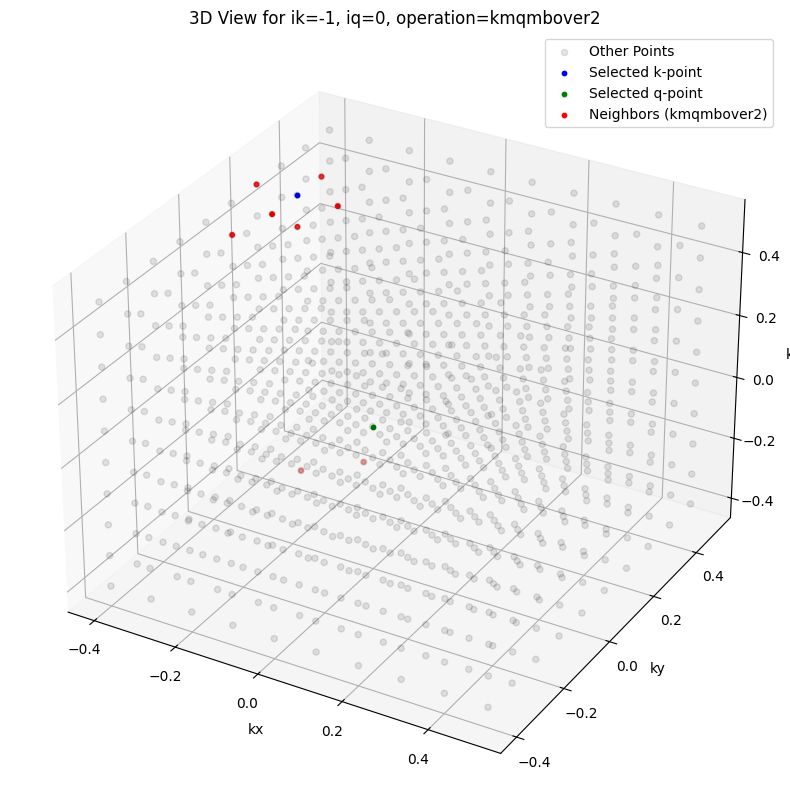

In [146]:
%matplotlib inline
check_kgridoperations_3d(nnkp_kgrid, nnkp_qgrid, ik=-1, iq=0, operation='kmqmbover2')

In [68]:
set1 = {}

In [69]:
print(set1)

{}


In [66]:
a

NameError: name 'a' is not defined